# 数组广播机制

In [1]:
import numpy as np

正常的加法：

In [2]:
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]])
b = np.array([[0,1,2],
             [0,1,2],
             [0,1,2],
             [0,1,2]])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

将b的值变成一维的[0,1,2]之后的加法：

In [3]:
b = np.array([0,1,2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

结果一样，虽然两个数组的维数不一样，但是 Numpy 检测到 b 的维度与 a 的维度匹配，所以将 b 扩展为之前的形式，得到相同的形状。

对于更高维度，这样的扩展依然有效。

如果我们再将 a 变成一个列向量呢？

In [5]:
a = np.array([0,10,20,39])
a.shape = 4,1
a

array([[ 0],
       [10],
       [20],
       [39]])

In [12]:
b.shape

(3,)

In [13]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

可以看到，虽然两者的维度并不相同，但是**Numpy**还是根据两者的维度，自动将它们进行扩展然后进行计算。

对于 **Numpy** 来说，维度匹配当且仅当：

- 维度相同
- 有一个的维度是1

匹配会从最后一维开始进行，直到某一个的维度全部匹配为止，因此对于以下情况，**Numpy** 都会进行相应的匹配：

A|B|Result
---|---|---
3d array: 256 x 256 x 3 | 1d array: 3 | 3d array: 256 x 256 x 3
4d array: 8 x 1 x 6 x 1 | 3d array: 7 x 1 x 5 | 3d array: 8 x 7 x 6 x 5
3d array: 5 x 4 x 3 | 1d array: 1 | 3d array: 5 x 4 x 3
3d array: 15 x 4 x 13 | 1d array: 15 x 1 x 13 | 3d array: 15 x 4 x 13
2d array: 4 x 1 | 1d array: 3 | 2d array: 4 x 3

匹配成功后，**Numpy** 会进行运算得到相应的结果。

当然，如果相应的维度不匹配，那么**Numpy**会报错：

In [14]:
a = np.array([0,10,20,30])
a.shape

(4,)

In [15]:
b.shape

(3,)

In [16]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

将a转换为列向量,还可以计算出结果：

In [17]:
a[:,np.newaxis] + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [18]:
x = np.linspace(-.5,.5,21)
y = x[:,np.newaxis]

In [21]:
x.shape

(21,)

In [20]:
y.shape

(21, 1)

先形成一个21乘21的网格，再计算网格到原点的距离：

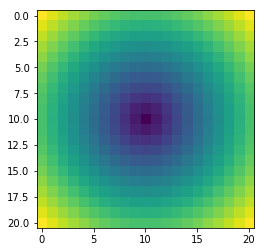

In [22]:
radius = np.sqrt(x ** 2 + y ** 2)
import matplotlib.pyplot as plt 
%matplotlib inline

plt.imshow(radius)